<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 169.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 140.9 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
df.info

<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [8]:
## Write your code here
null_values=df.isnull().sum()
print(null_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


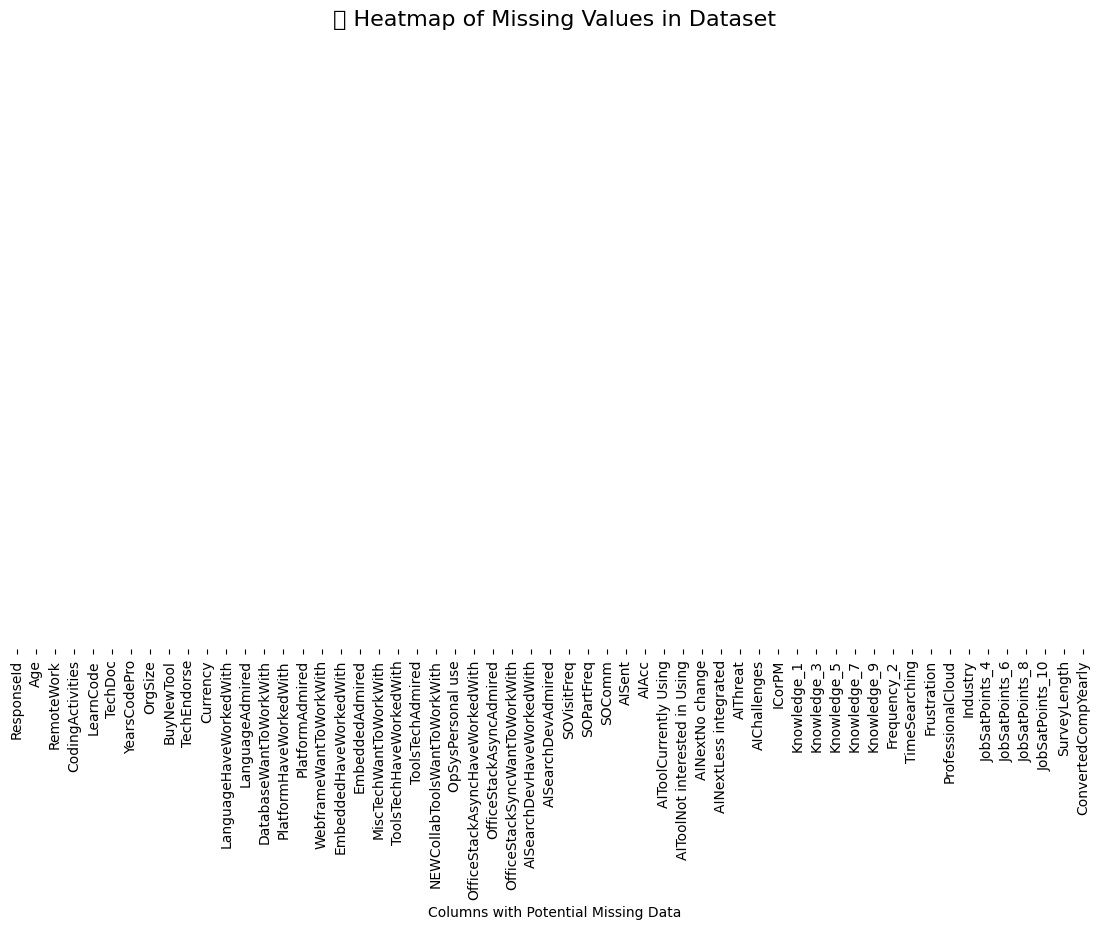

In [9]:
## Write your code here
plt.figure(figsize=(14, 8))

# Create the heatmap
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap="viridis", 
            yticklabels=False, 
            linecolor='white', 
            linewidths=0.1)

# Title and display
plt.title("🔍 Heatmap of Missing Values in Dataset", fontsize=16)
plt.xlabel("Columns with Potential Missing Data")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [10]:
miss=df["Employment"].isnull().sum()
print(miss)

0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [12]:
## Write your code here
most_common = df['Employment'].mode()
print("🔁 Most frequent value in 'Employment':", most_common[0])

value_counts = df['Employment'].value_counts()
print("📊 Frequency counts in 'Employment':\n", value_counts)

# Get the most common value
most_common_value = value_counts.idxmax()
print("🔁 Most frequent value in 'Employment':", most_common_value)


🔁 Most frequent value in 'Employment': Employed, full-time
📊 Frequency counts in 'Employment':
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                 

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [14]:
most_frequent = df['Employment'].mode()[0]

# Fill missing values (correctly)
df['Employment'] = df['Employment'].fillna(most_frequent)

# Confirm fix
print(f"✅ Missing values in 'Employment' after imputation: {df['Employment'].isnull().sum()}")

✅ Missing values in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_499/2102363733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette="Set2")
/tmp/ipykernel_499/2102363733.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_499/2102363733.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


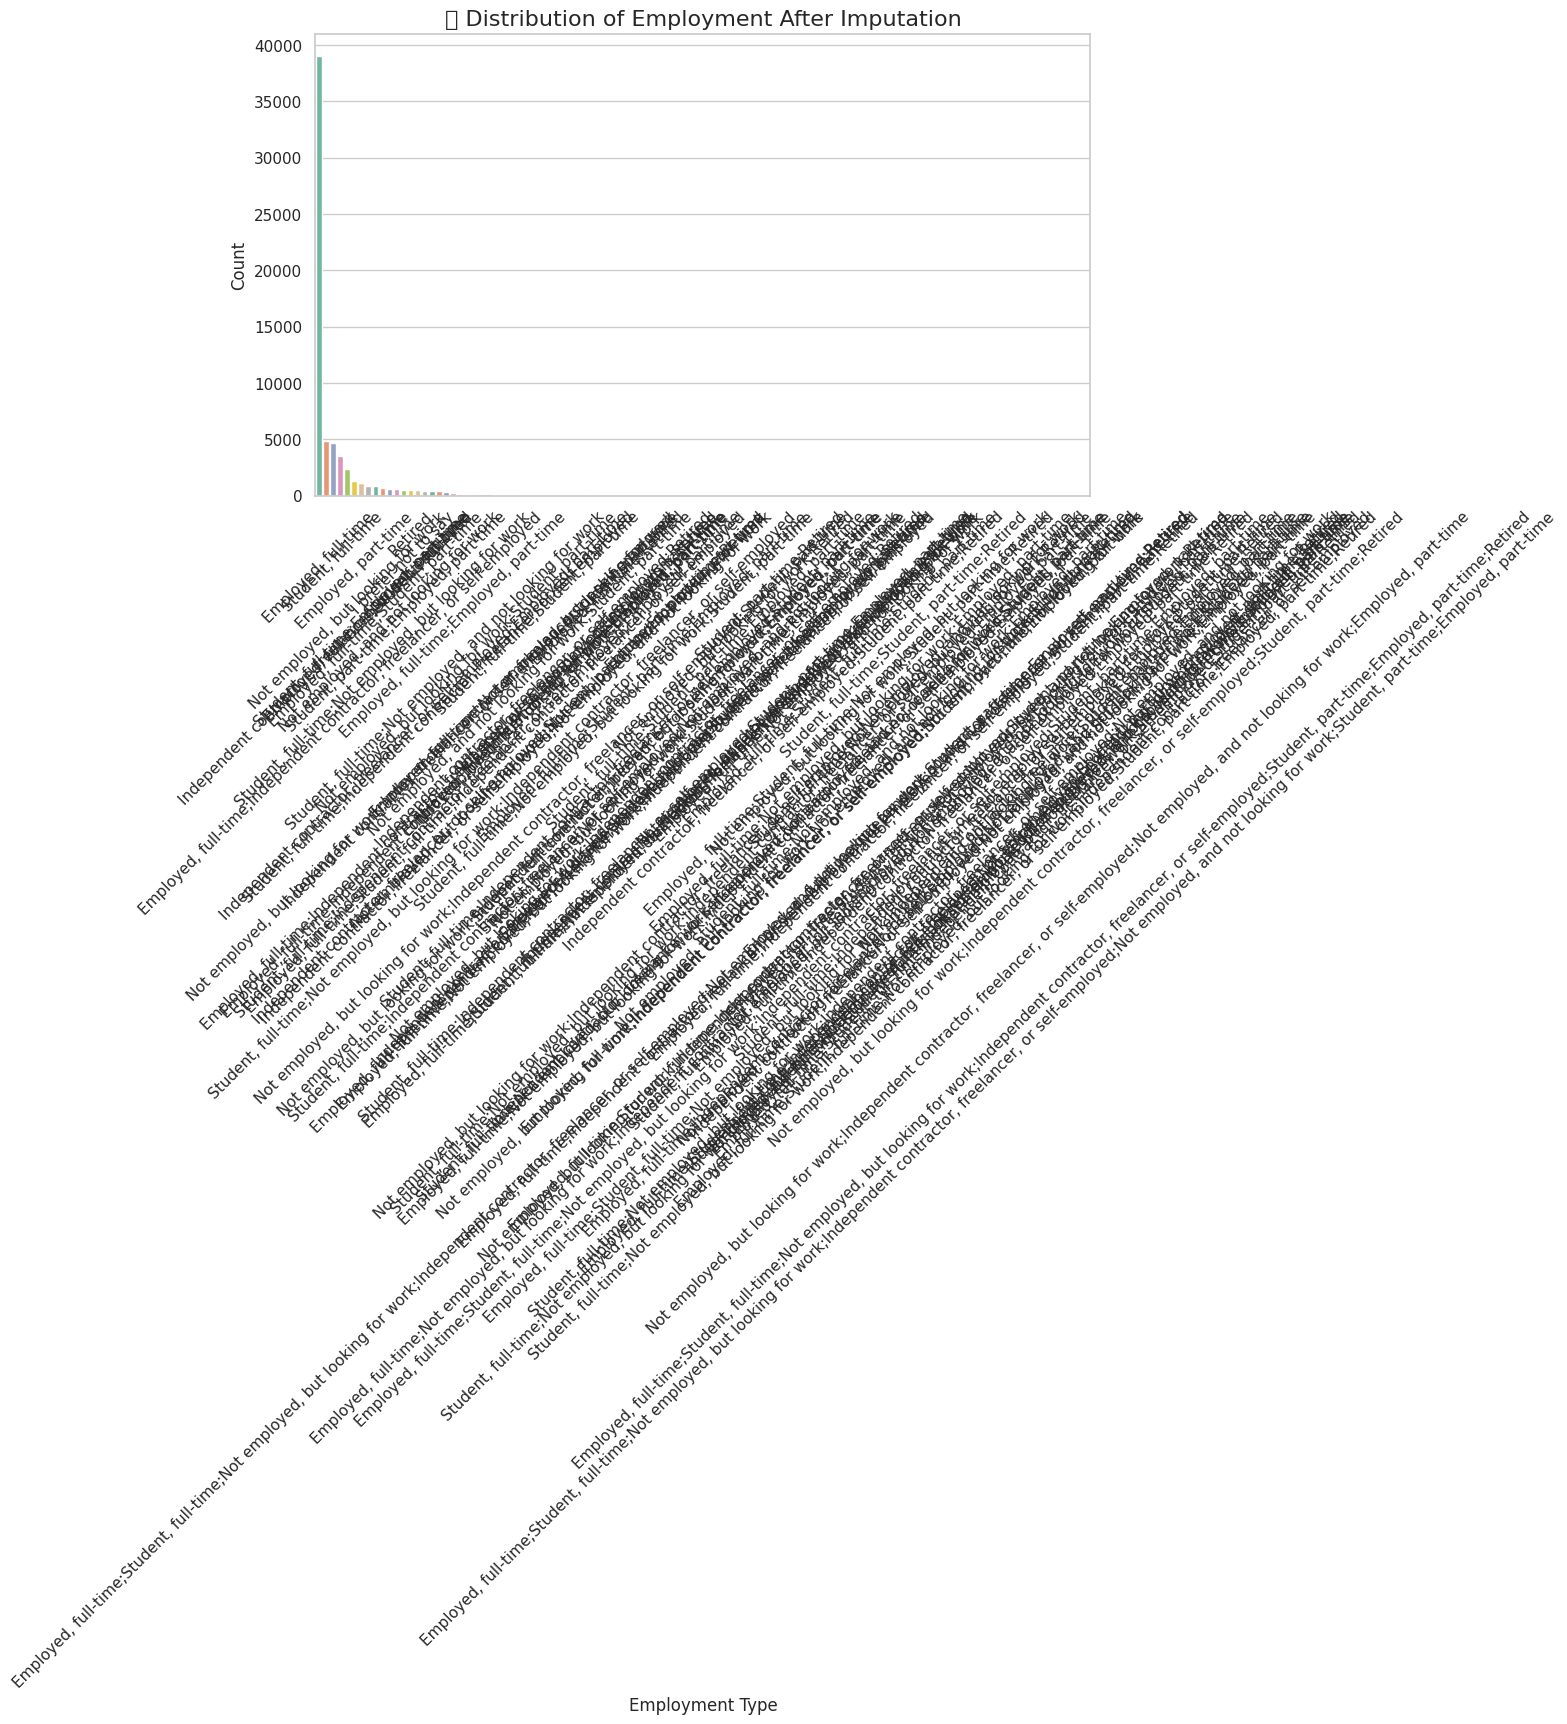

In [15]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the distribution
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, palette="Set2")

# Add title and labels
plt.title("📊 Distribution of Employment After Imputation", fontsize=16)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
